# Differential Equations
- Differential equation functionality in Julia with explanation

### Basics: Functions and Derivatives
- Functions can be defined using syntax equivalent to the mathematical notation
- Derivatives are not built in to Julia's standard library, so I have included the following libraries
- https://github.com/JuliaSymbolics/Symbolics.jl
- https://github.com/SciML/ModelingToolkit.jl
- https://github.com/SciML/DifferentialEquations.jl

In [1]:
using Symbolics

# declare a variable to differente with respect to
@variables x
D = Differential(x)

# define function with symbolic variable x
y = x^3

# calculate derivative
dy = D(y) |> expand_derivatives


3(x^2)

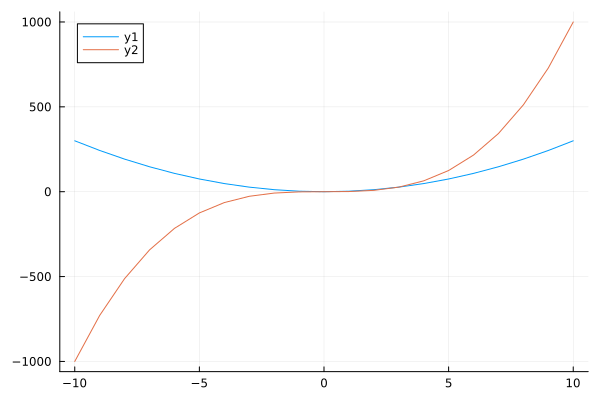

In [2]:
using Plots

# convert symbolic expression to Julia function
dy = build_function(dy, x, expression = Val{false}) |> eval
y = build_function(y, x, expression = Val{false}) |> eval

plot!(-10:10, dy)
plot!(-10:10, y)

### Second Order ODE
- Pendulum motion can be modeled with these types of ODEs
- The DifferentialEquations library provides ODE solvers

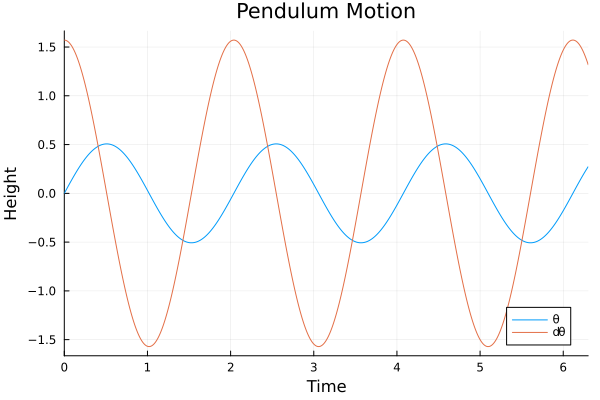

In [6]:
using DifferentialEquations, Plots

const g = 9.81
L = 1.0

u₀ = [0, π / 2]
tspan = (0.0, 6.3)

function pendulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g / L) * sin(θ)
end

problem = ODEProblem(pendulum, u₀, tspan)
solution = solve(problem, Tsit5())

plot(
    solution, 
    title = "Pendulum Motion", 
    xaxis = "Time",
    yaxis = "Height", 
    label = ["\\theta" "d\\theta"]
)